In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

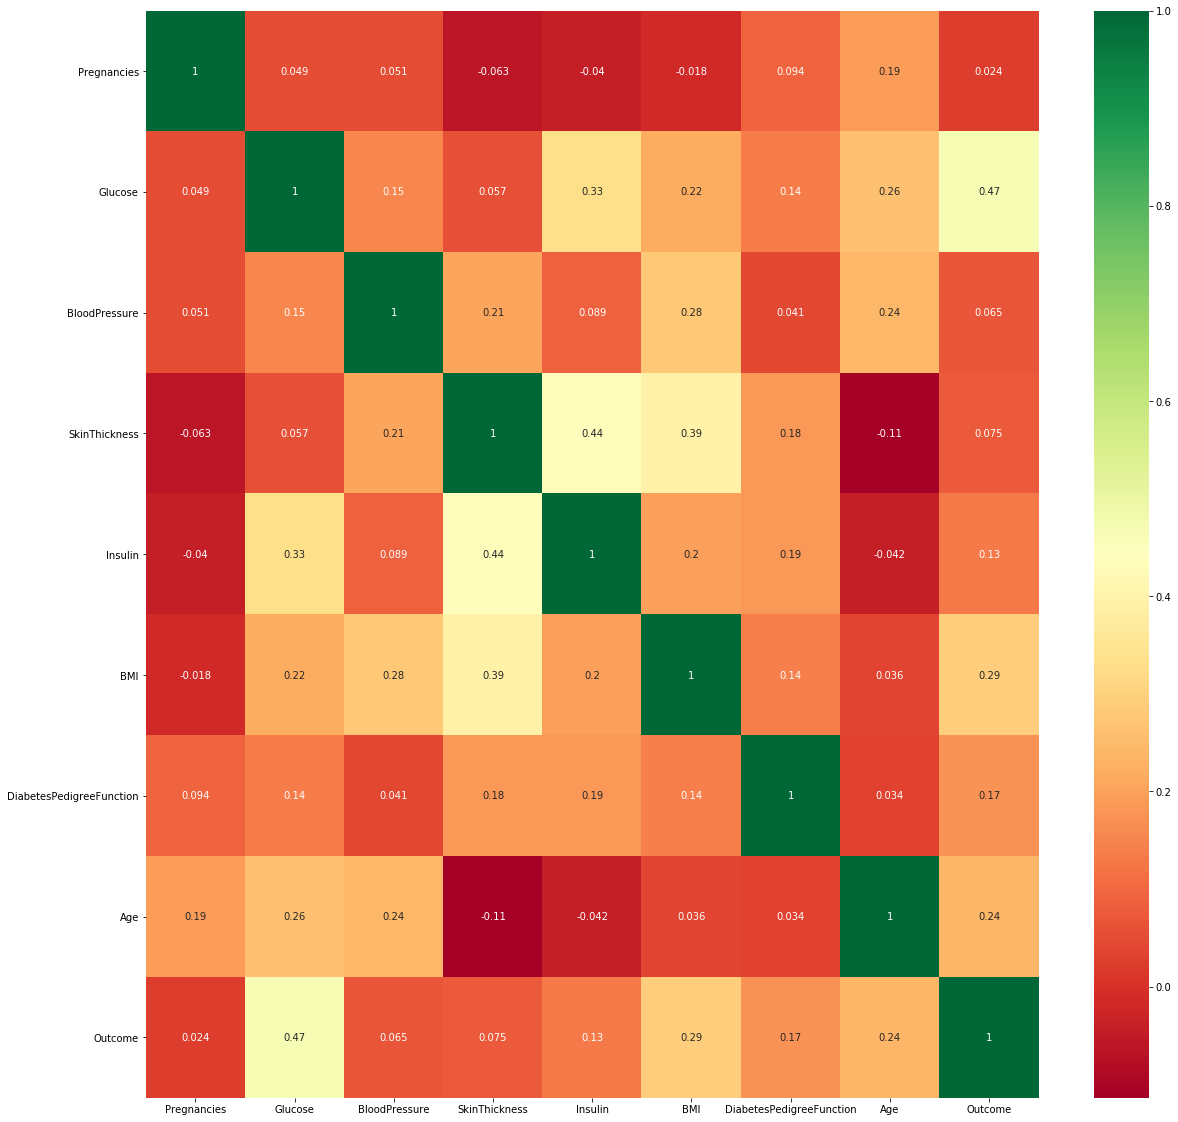

In [6]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.048650,0.051181,-0.062951,-0.040494,-0.017560,0.093932,0.192049,0.024350
Glucose,0.048650,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.051181,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.062951,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.040494,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,-0.017560,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.093932,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.192049,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.024350,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


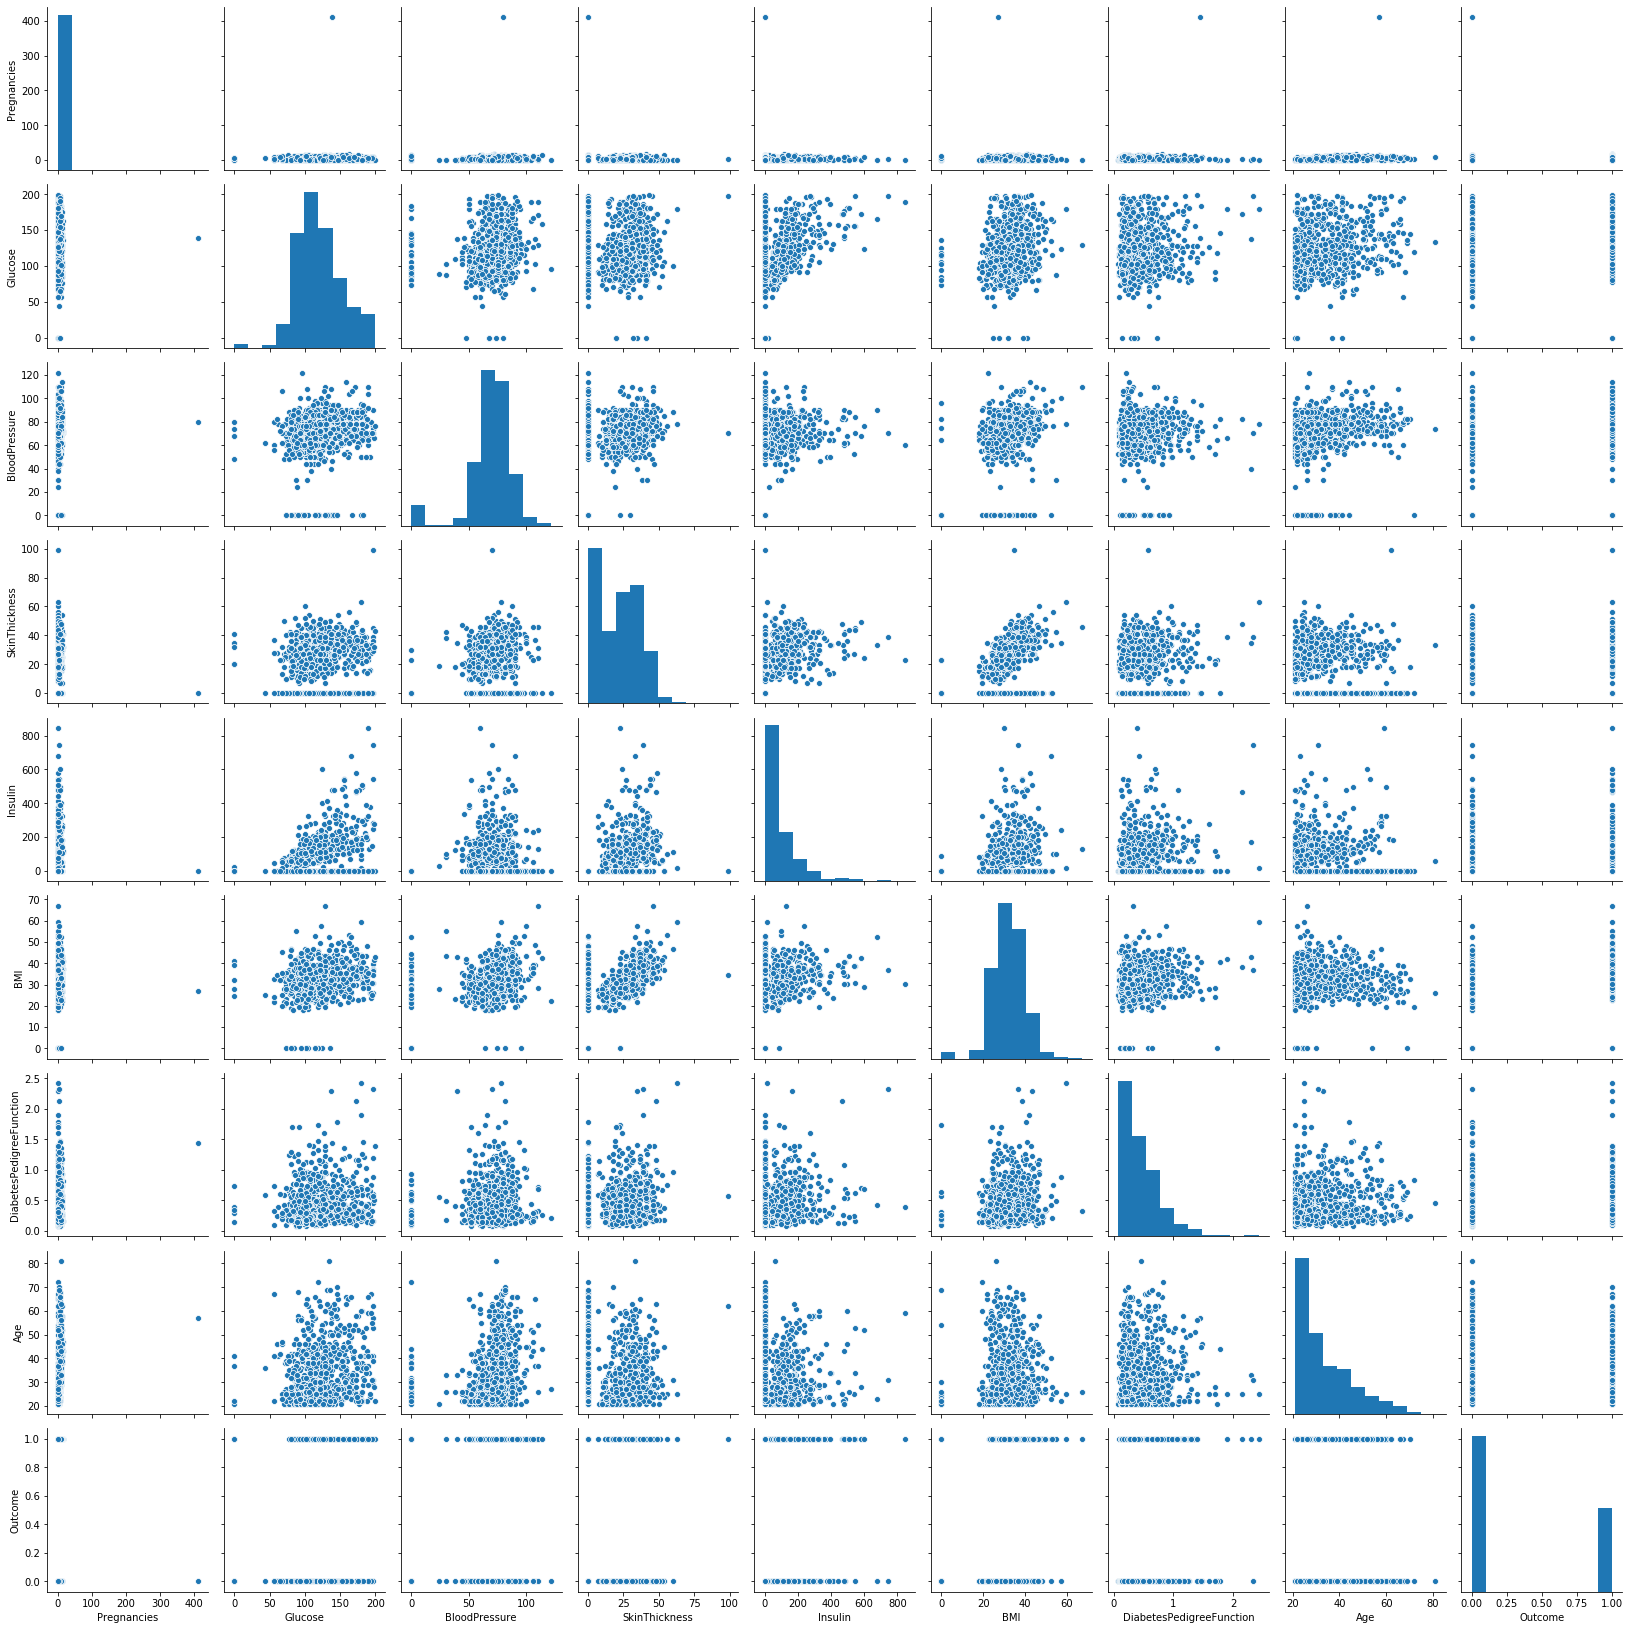

In [8]:
sns.pairplot(df)

In [9]:
diabetes_true = len(df.loc[df['Outcome']== 1 ])
diabetes_false = len(df.loc[df['Outcome']== 0 ])

In [10]:
(diabetes_true,diabetes_false)

(268, 500)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted = ['Outcome']

In [13]:
X = df[features].values
y = df[predicted].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


In [15]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure	: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(df.loc[df['Age'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure	: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [16]:
from sklearn.impute import SimpleImputer
fill_val = SimpleImputer(missing_values = 0, strategy = 'mean')
X_train = fill_val.fit_transform(X_train)
X_test = fill_val.fit_transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [18]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.766


In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

C:\Users\Rajat\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
prediction = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, prediction)))

Accuracy = 0.688


In [21]:
import pickle

pickle.dump(random_forest_model, open('model.pkl','wb'))

In [22]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1,89,66,23,94,28.1,0.167,21]]))

[0]


In [23]:
X_test

array([[  4.        , 154.        ,  72.        , ...,  31.3       ,
          0.338     ,  37.        ],
       [  2.        , 112.        ,  86.        , ...,  38.4       ,
          0.246     ,  28.        ],
       [  1.        , 135.        ,  54.        , ...,  26.7       ,
          0.687     ,  62.        ],
       ...,
       [  3.        , 150.        ,  76.        , ...,  21.        ,
          0.207     ,  37.        ],
       [  3.        , 130.        ,  64.        , ...,  23.1       ,
          0.314     ,  22.        ],
       [  6.92105263, 108.        ,  68.        , ...,  27.3       ,
          0.787     ,  32.        ]])